# Support vector machines

In [1]:

import pandas as pd


dataframes = {
    'mean': pd.read_csv('imputed/mean.csv'),
    'median': pd.read_csv('imputed/median.csv'),
    'mode': pd.read_csv('imputed/mode.csv'),
    'KNN': pd.read_csv('imputed/KNN.csv'),
    'MICE': pd.read_csv('imputed/MICE.csv'),
    'iterative': pd.read_csv('imputed/iterative.csv'),
}   

In [2]:
from sklearn.svm import SVC
from util.functions import train
model = SVC()

results = train(model)

learning with mean imputed data
learning with median imputed data
learning with mode imputed data
learning with KNN imputed data
learning with MICE imputed data
learning with iterative imputed data


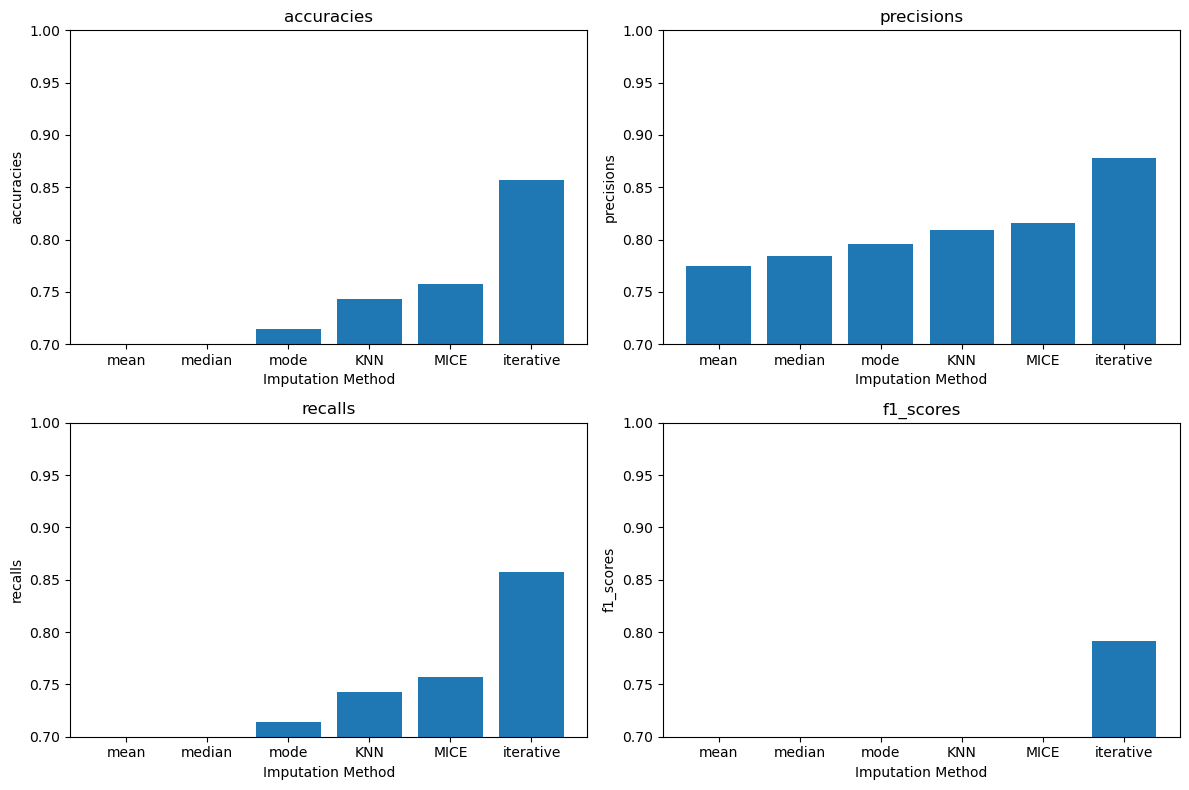

In [3]:
from util.functions import plot_metrics
plot_metrics(results['metrics'])


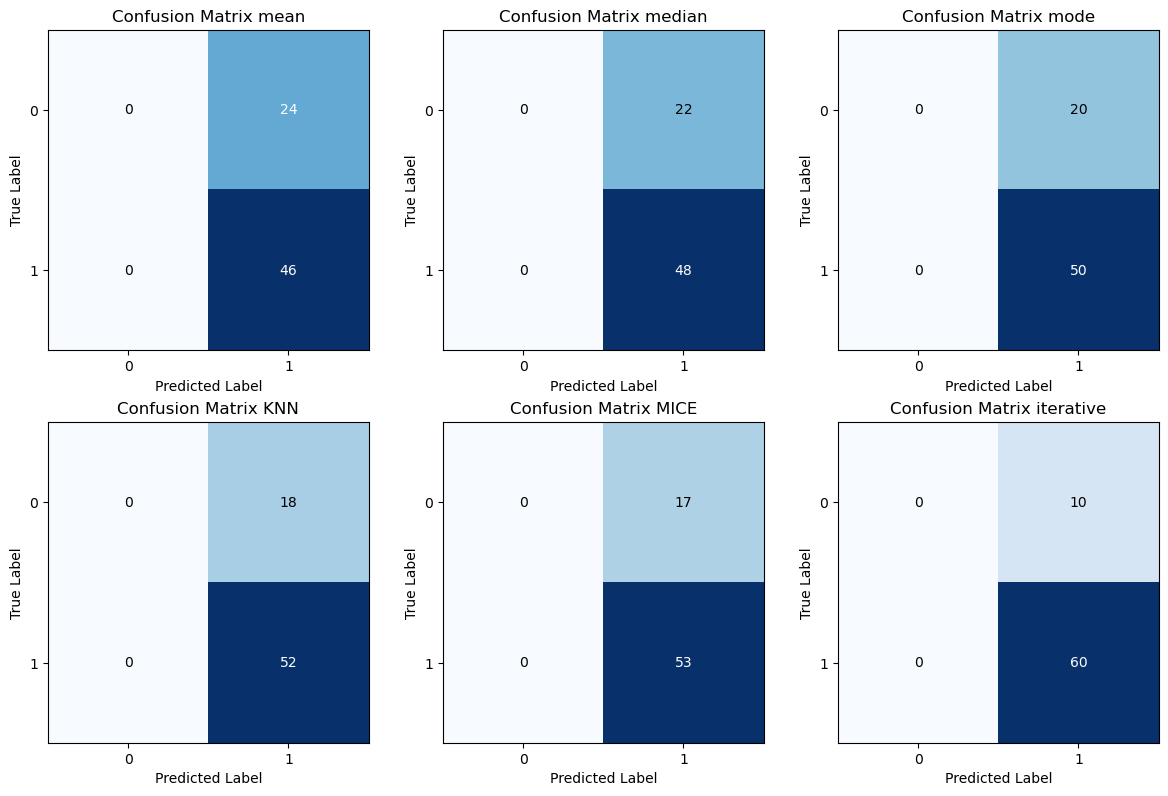

In [4]:
from util.functions import plot_confusion_matrices
plot_confusion_matrices(results['confusion_matrices'])

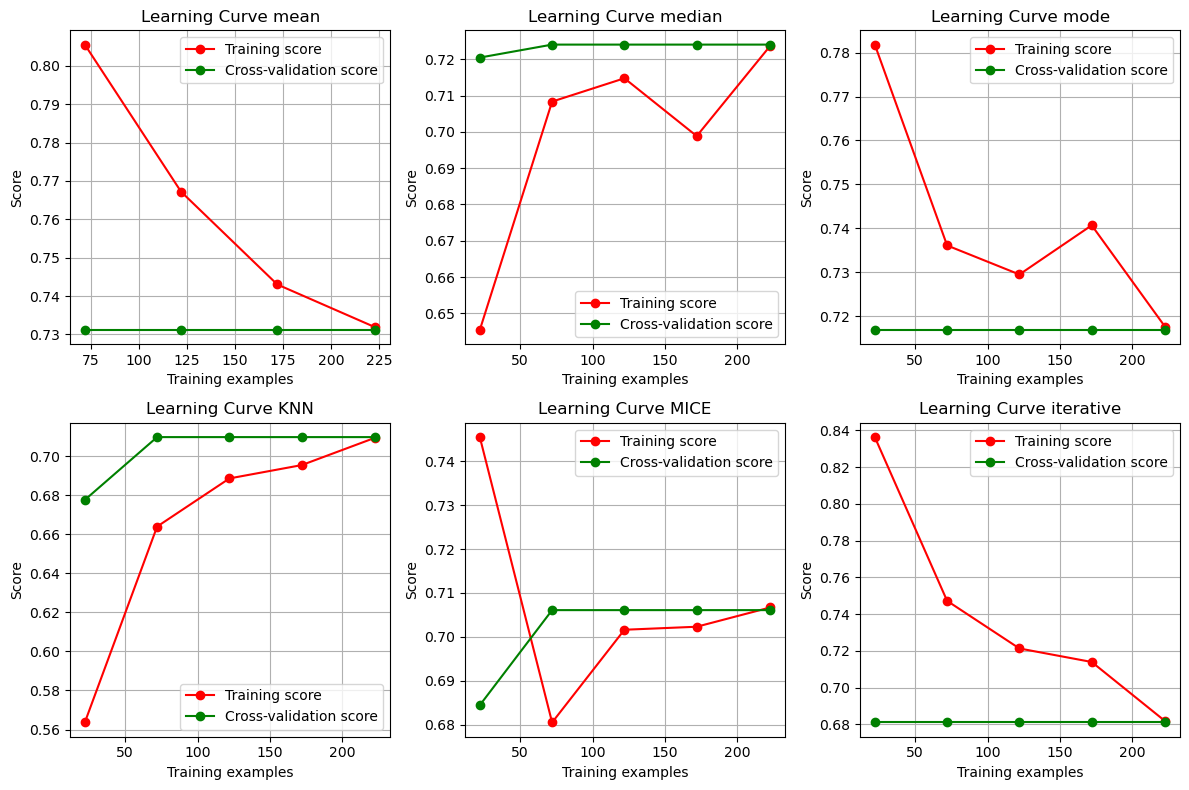

In [5]:
from util.functions import plot_learning_curves
plot_learning_curves(results['learning_curves'])

In [6]:
#feature importances
# todo